# **Exercise 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

In [2]:
exe_dir = "/home/aswathy/DATA_ANALYSIS/datalab/code"
output_dir = "/home/aswathy/DATA_ANALYSIS/datalab/solutions"

# **Task 1**  
Plot various realisations of signal plus noise. Use different signal amplitudes with generate_source until you can not distinguish the signal because it is too faint.

In [3]:
"""
Usage: ./generate_source  [-h] [-o <file>] [-s <float>] [-d <float>] [-N <int>] [-f <float>] [-p <float>]
                          [-a <float>] [-r <int>]
  -o, --output=<file>       output file
  -s, --sigma=<float>       standard deviation sigma
  -d, --deltaT=<float>      delta T betwean measurements
  -N, --length=<int>        number of elements
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -a, --amplitude=<float>   signal amplitude
  -r, --random=<int>        if set to 1, generate random signal
  -h, --help                print this help and exit
"""      

def generate_source(outputFile=None, sigma=0, f=10, A=1, delta_T=None, N=10000, phi=0, r=0):
    if delta_T == None : 
        delta_T = 1/N
           
    outputPath = os.path.join(output_dir, outputFile) # output_dir + "/" + "myfilename.csv"
    exe_path = os.path.join(exe_dir, 'generate_source')
    cmd_str = f"{exe_path} -o {outputFile} -s {sigma} -d {delta_T} -N {N} -f {f} -p {phi} -a {A} -r {r}"
    
    print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())

    return

In [4]:
def plot_data(filename, title=None):       
    data = np.loadtxt(filename)
    plt.plot(data[:,0],data[:,1])
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    if (title):
        plt.title(title, fontsize=15)
    plt.savefig(filename.replace('.csv', '.jpg'))
    plt.show()
    plt.close()

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_01.csv -s 0.0 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


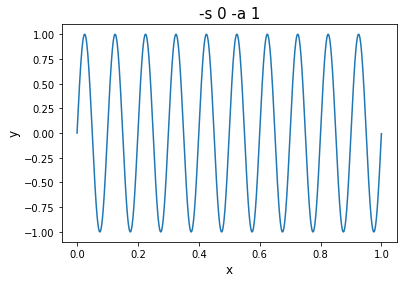

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_02.csv -s 0.5 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


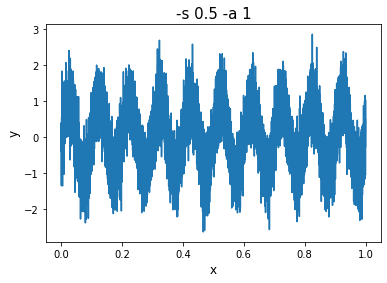

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_03.csv -s 5 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


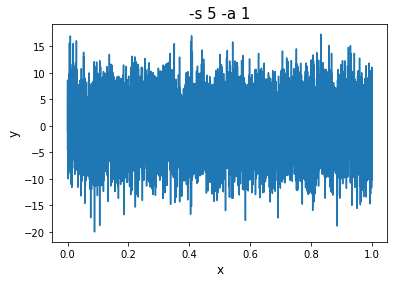

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_04.csv -s 10 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


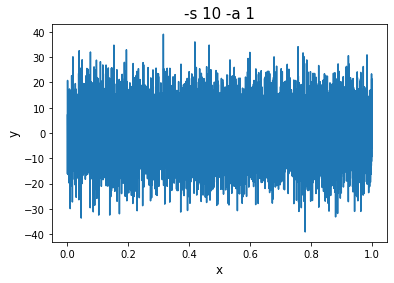

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_05.csv -s 10 -d 0.0001 -N 10000 -f 10 -p 0 -a 0 -r 0


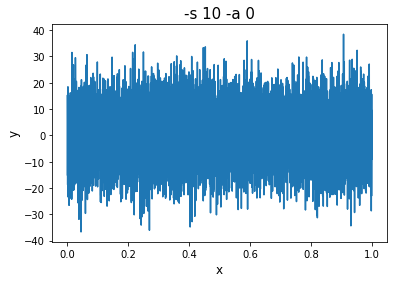

In [5]:
data_set = {
    1: {
        'sigma': 0.0,
        'A': 1,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_01.csv",
        'title': "-s 0 -a 1",
    },
    2: {
        'sigma': 0.5,
        'A': 1,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_02.csv",
        'title': "-s 0.5 -a 1",
    },
    3: {
        'sigma': 5,
        'A': 1,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_03.csv",
        'title': "-s 5 -a 1",
    },
    4: {
        'sigma': 10,
        'A': 1,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_04.csv",
        'title': "-s 10 -a 1",
    },
    5 : {
        'sigma': 10,
        'A': 0,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_05.csv",
        'title': "-s 10 -a 0",
    }
}

for key, value in data_set.items():
    generate_source(value.get('filename'), sigma=value.get('sigma'), A=value.get('A'), f=value.get('f'), delta_T=value.get('delta_T'))
    plot_data(value.get('filename'), title=value.get('title'))

# **Task 2**
Learn to use prober, our small black box program computing a scalar result based upon input
time series and parameter point (f, φ).

In [6]:
"""
Usage: ./prober  [-h] [-i <file>] [-o <file>] [-f <float>] [-p <float>] [-t <file>] [-m <int>]
  -i, --input=<file>        input file
  -o, --output=<file>       output file
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -h, --help                print this help and exit
  -t, --templatebank=<file> template bank file
  -m, --method=<int>        select method to analyze signal 1, 2 or 3
"""

def prober(inputFile, f=0, outputFile=None, phi=0, template=None, mod=0):
    
    exe_path = os.path.join(exe_dir, 'prober')
    cmd_str = f"{exe_path} -i {output_dir}/{inputFile} -o {output_dir}/{outputFile} -m {mod}"
    if template:
        cmd_str += f" -t {output_dir}/{template} "
    else:
        cmd_str += f" -f {f} -p {phi}"
        
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())
    
    return

In [7]:
prober("data_01.csv", f=10, mod=1)

The process has an output: 10 0 0.5



# **Task 3**
Learn how prober results change, varying the parameters of an injected signal while probing
the same parameter point

In [8]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, mod=1)

The process has an output: 10 0 0.5

The process has an output: 10 0 0.498683

The process has an output: 10 0 0.543715

The process has an output: 10 0 0.584722

The process has an output: 10 0 0.0949195



In [9]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, mod=2)

The process has an output: 10 0 3.34998e-13

The process has an output: 10 0 0.250787

The process has an output: 10 0 24.6515

The process has an output: 10 0 99.7956

The process has an output: 10 0 98.9924



Prober result at different frequency

In [10]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=5, mod=1)

The process has an output: 5 0 1.99918e-10

The process has an output: 5 0 0.00123271

The process has an output: 5 0 -0.0118137

The process has an output: 5 0 0.0630721

The process has an output: 5 0 -0.0537785



In [11]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=5, mod=2)

The process has an output: 5 0 1

The process has an output: 5 0 1.24569

The process has an output: 5 0 25.7626

The process has an output: 5 0 100.839

The process has an output: 5 0 99.29



Prober result at different phase

In [12]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, phi=0.25, mod=1)

The process has an output: 10 0.25 0.484459

The process has an output: 10 0.25 0.483344

The process has an output: 10 0.25 0.50981

The process has an output: 10 0.25 0.556822

The process has an output: 10 0.25 0.0927316



In [13]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, phi=0.25, mod=2)

The process has an output: 10 0.25 0.0310878

The process has an output: 10 0.25 0.281465

The process has an output: 10 0.25 24.7193

The process has an output: 10 0.25 99.8516

The process has an output: 10 0.25 98.9967



# **Task 4**
Plot/document result findings: how large may the mismatch between injection and probe
parameter may become? What happens with weak signals (small amplitude)?

In [14]:
def new_plot_data(prober_results, mode, freq):       
    data = np.loadtxt(prober_results)
    plt.figure()
    plt.xlim([0.0,100.0])
    plt.plot(data[:,0],data[:,2])
    plt.show()
    
    #S_2 searching for the minimum value
    if mode == 2:
        best = np.where(data[:,2] == np.min(data[:,2]))
        print("Frequency  f = {0:.3f}Hz".format(freq))
        print("Minimum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Minimum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
    else:
        best = np.where(data[:,2] == np.max(data[:,2]))
        print("Frequency  f = {0:.3f}Hz".format(freq))
        print("Maximum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Maximum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
        
    

In [15]:
#creating a template_bank 
n = 50
freq = np.linspace(0.01, 100.0, n)
with open("temp_bank", "w") as file:
    for i in range(n):
        file.write("{0} {1}\n".format(freq[i],0))

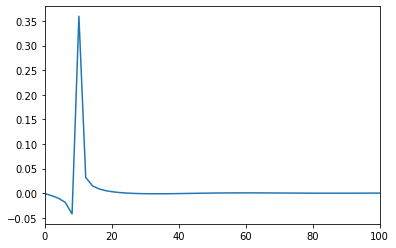

Frequency  f = 10.000Hz
Maximum value is at f = 10.213Hz
Maximum Value       = 0.360 (0.35965000)


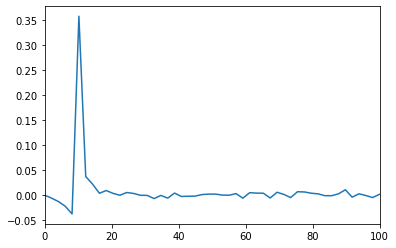

Frequency  f = 10.000Hz
Maximum value is at f = 10.213Hz
Maximum Value       = 0.358 (0.35794600)


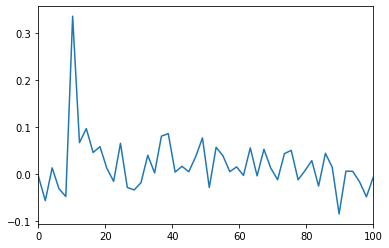

Frequency  f = 10.000Hz
Maximum value is at f = 10.213Hz
Maximum Value       = 0.336 (0.33602000)


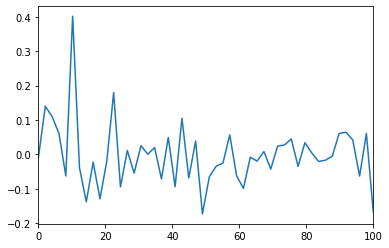

Frequency  f = 10.000Hz
Maximum value is at f = 10.213Hz
Maximum Value       = 0.401 (0.40126000)


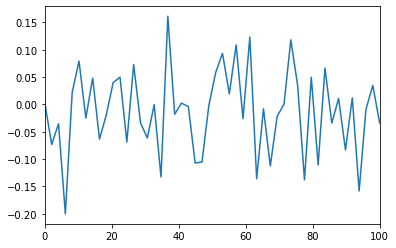

Frequency  f = 10.000Hz
Maximum value is at f = 36.741Hz
Maximum Value       = 0.161 (0.16128200)


In [16]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, outputFile=f"results_{i}", template="temp_bank", mod=1)
    new_plot_data(prober_results=f"results_{i}", mode=1, freq=10)

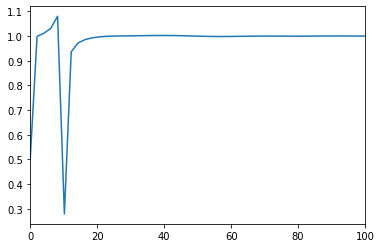

Frequency  f = 10.000Hz
Minimum value is at f = 10.213Hz
Minimum Value       = 0.279 (0.27890900)


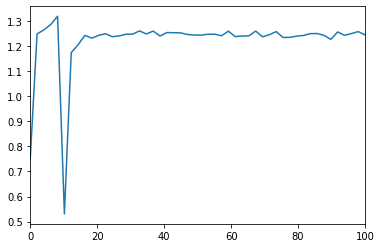

Frequency  f = 10.000Hz
Minimum value is at f = 10.213Hz
Minimum Value       = 0.530 (0.53047000)


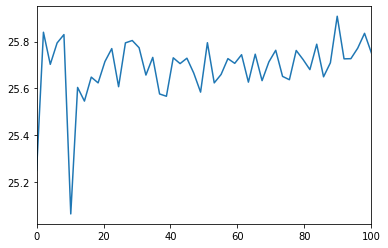

Frequency  f = 10.000Hz
Minimum value is at f = 10.213Hz
Minimum Value       = 25.065 (25.06510000)


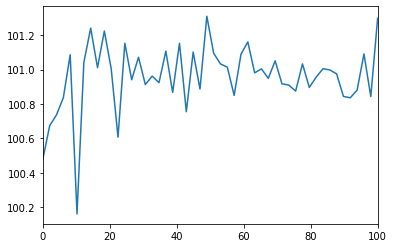

Frequency  f = 10.000Hz
Minimum value is at f = 10.213Hz
Minimum Value       = 100.161 (100.16100000)


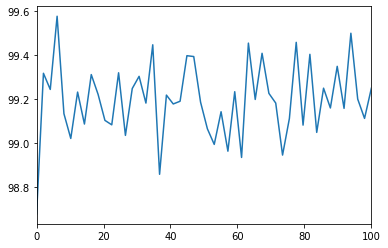

Frequency  f = 10.000Hz
Minimum value is at f = 0.010Hz
Minimum Value       = 98.680 (98.67950000)


In [17]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, outputFile=f"results_{i}", template="temp_bank", mod=2)
    new_plot_data(prober_results=f"results_{i}", mode=2, freq=10)

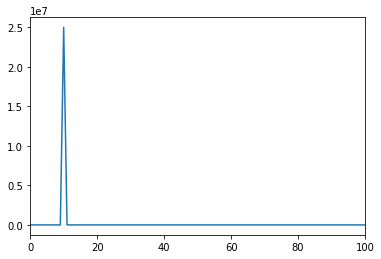

Frequency  f = 10.000Hz
Maximum value is at f = 10.000Hz
Maximum Value       = 25000000.000 (25000000.00000000)


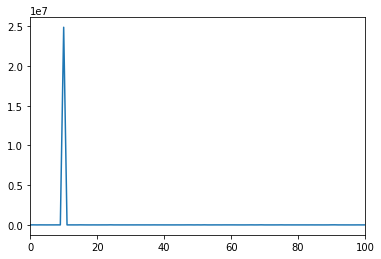

Frequency  f = 10.000Hz
Maximum value is at f = 10.000Hz
Maximum Value       = 24868500.000 (24868500.00000000)


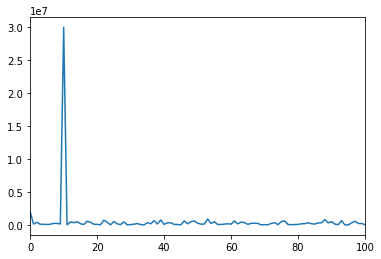

Frequency  f = 10.000Hz
Maximum value is at f = 10.000Hz
Maximum Value       = 30034900.000 (30034900.00000000)


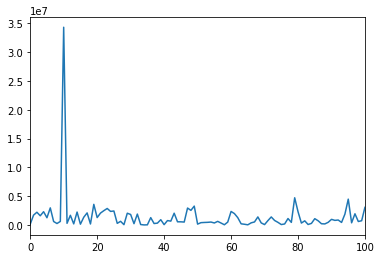

Frequency  f = 10.000Hz
Maximum value is at f = 10.000Hz
Maximum Value       = 34344200.000 (34344200.00000000)


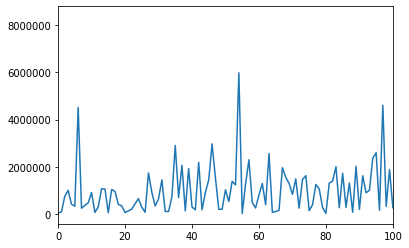

Frequency  f = 10.000Hz
Maximum value is at f = 1698.000Hz
Maximum Value       = 8377350.000 (8377350.00000000)


In [18]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, outputFile=f"results_{i}", template="temp_bank", mod=3)
    new_plot_data(prober_results=f"results_{i}", mode=3, freq=10)

# **Task 5**
Develop an strategy to find signal with prober if the signal parameters (A, f, φ) are unknown.

In [38]:
generate_source("data_task5.csv", sigma=0, f=10, A=2, phi=0.5)

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_task5.csv -s 0 -d 0.0001 -N 10000 -f 10 -p 0.5 -a 2 -r 0


In [72]:
def plot_data_task5(prober_results, mode, freq, phi):       
    data = np.loadtxt(prober_results)
    plt.figure()
    plt.xlim([0.0,100.0])
    plt.plot(data[:,0],data[:,2])
    plt.show()
    
    #S_2 searching for the minimum value
    if mode == 2:
        best = np.where(data[:,2] == np.min(data[:,2]))
        #print("Frequency  f = {0:.3f}Hz".format(freq))
        print("Minimum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Minimum value is at phi = {0:.3f}".format(data[:,1][best][0]))
        print("Minimum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
    else:
        best = np.where(data[:,2] == np.max(data[:,2]))
        #print("Frequency  f = {0:.3f}Hz".format(freq))
        print("Maximum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Maximum value is at phi = {0:.3f}".format(data[:,1][best][0]))
        print("Maximum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
        
    

In [45]:
nfrq = 300
nphi = 50
freq = np.linspace(0.01, 100.0, nfrq)
phi = np.linspace(0, 2*np.pi, nphi)
#f = 20
#p = 0.5

with open("temp_bank2", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(freq[i], phi[j]))

prober("data_task5.csv", outputFile="results_task5", template="temp_bank2", mod=1)
results_file = np.loadtxt("results_task5")
print(results_file)



[[ 1.00000e-02  0.00000e+00 -1.75704e-03]
 [ 1.00000e-02  1.28228e-01 -1.73569e-03]
 [ 1.00000e-02  2.56457e-01 -1.68581e-03]
 ...
 [ 1.00000e+02  6.02673e+00 -3.56269e-09]
 [ 1.00000e+02  6.15496e+00 -1.79810e-08]
 [ 1.00000e+02  6.28319e+00 -1.99993e-08]]


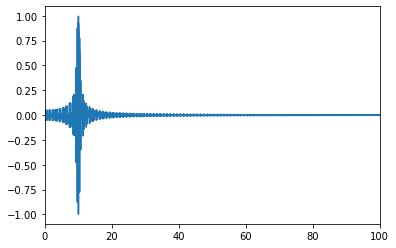

Minimum value is at f = 10.042Hz
Minimum value is at phi = 3.462
Minimum Value       = -0.995 (-0.99474700)
(1, 1)


In [73]:
plot_data_task5(prober_results="results_task5", mode=2, freq=10, phi=0.5)


(5000,)


TypeError: Input z must be at least a 2x2 array.

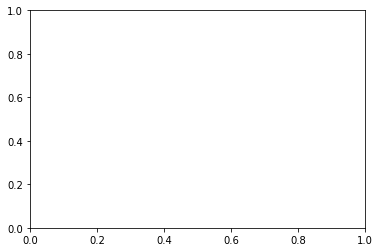

In [33]:
#f = results_file[:,0]
#p = results_file[:,1]
#values = results_file[:,2]
#print(np.shape(values))
#Z = np.reshape(values,(values.size,values.size))
#print(np.shape(Z))
#X, Y = np.meshgrid(f,p)
#plt.contourf(X, Y, Z)